In [1]:
# importar librerias

import pandas as pd
import seaborn as sns
from sqlalchemy import engine
from pandasql import sqldf
from IPython.display import Image

# funcion lambda que hace escribir funciones sql mucho mas facil

pysqldf = lambda q:sqldf(q, globals())

### Importar archivos .CSV

In [2]:
### Importamos dataset de valuacion de jugadores de futbol, el archivo de jugadores
### con sus respectivos nombres y datos del club en el que juegan
### https://www.kaggle.com/datasets/davidcariboo/player-scores

clubes = pd.read_csv("clubs.csv")
jugadores = pd.read_csv("players/players.csv")
valuaciones = pd.read_csv("player_valuations/player_valuations.csv")

In [3]:
jugadores

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30494,1201580,Yusuf,Yılmaz,Yusuf Yılmaz,2023,6890,yusuf-yilmaz,Türkiye,Istanbul,Türkiye,...,right,193.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yusuf-yilmaz/p...,TR1,İstanbul Başakşehir Futbol Kulübü,50000.0,50000.0
30495,1214946,Sid Ahmed,Aissaoui,Sid Ahmed Aissaoui,2023,2410,sid-ahmed-aissaoui,Algeria,Blida,Algeria,...,right,183.0,2026-06-30 00:00:00,Aniss Benchabane,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sid-ahmed-aiss...,RU1,PFK CSKA Moskva,150000.0,150000.0
30496,1225269,Erdem,Çalık,Erdem Çalık,2023,3209,erdem-calik,Türkiye,Istanbul,Türkiye,...,right,NaN,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/erdem-calik/pr...,TR1,Pendikspor,50000.0,50000.0
30497,1229924,Adama,Sidibeh,Adama Sidibeh,2023,2578,adama-sidibeh,NaN,NaN,The Gambia,...,NaN,NaN,2026-05-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/adama-sidibeh/...,SC1,Saint Johnstone Football Club,NaN,NaN


In [4]:
clubes

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,31,26.6,11,35.5,1,Merck-Stadion am Böllenfalltor,17810,€-1.48m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,27,27.9,15,55.6,6,Yekaterinburg Arena,23000,€-895k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,35,26.7,17,48.6,13,Tüpraş Stadyumu,42590,€-26.00m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.9,18,69.2,16,Olimpico di Roma,73261,+€63.00m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,68608,cf-os-belenenses,CF Os Belenenses,PO1,NaN,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,NaN,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/cf-os-belenens...
422,724,fc-volendam,Football Club Volendam,NL1,NaN,31,22.2,17,54.8,4,Kras Stadion,7384,+€2.30m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-volendam/st...
423,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,NaN,25,26.6,17,68.0,16,Gewiss Stadium,21747,+€73.82m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/atalanta-berga...
424,979,moreirense-fc,Moreirense Futebol Clube,PO1,NaN,29,25.7,17,58.6,3,Estádio C. J. de Almeida Freitas,6153,€-2.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/moreirense-fc/...


In [5]:
valuaciones

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
...,...,...,...,...,...
466897,937958,2024-03-21,75000000,131,ES1
466898,938158,2024-03-21,7500000,131,ES1
466899,941869,2024-03-21,500000,3709,ES1
466900,962110,2024-03-21,25000000,131,ES1


In [6]:
### Python en SQL
### Consultas basicas
### Seleccionamos todo el contenido de la tabla (en este caso todo el contenido del DataFrame que definamos en la consulta)

q = """
SELECT * from jugadores
"""
pysqldf(q)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,None,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,None,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,None,NaN,None,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,None,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,None,NaN,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,None,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30494,1201580,Yusuf,Yılmaz,Yusuf Yılmaz,2023,6890,yusuf-yilmaz,Türkiye,Istanbul,Türkiye,...,right,193.0,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yusuf-yilmaz/p...,TR1,İstanbul Başakşehir Futbol Kulübü,50000.0,50000.0
30495,1214946,Sid Ahmed,Aissaoui,Sid Ahmed Aissaoui,2023,2410,sid-ahmed-aissaoui,Algeria,Blida,Algeria,...,right,183.0,2026-06-30 00:00:00,Aniss Benchabane,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sid-ahmed-aiss...,RU1,PFK CSKA Moskva,150000.0,150000.0
30496,1225269,Erdem,Çalık,Erdem Çalık,2023,3209,erdem-calik,Türkiye,Istanbul,Türkiye,...,right,NaN,2026-06-30 00:00:00,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/erdem-calik/pr...,TR1,Pendikspor,50000.0,50000.0
30497,1229924,Adama,Sidibeh,Adama Sidibeh,2023,2578,adama-sidibeh,None,None,The Gambia,...,None,NaN,2026-05-31 00:00:00,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/adama-sidibeh/...,SC1,Saint Johnstone Football Club,NaN,NaN


### WHERE
### ORDER BY

### Crear un DataFrame de jugadores que esten valuados en mas de $500.000 y que su origen sea de Alemania y ordenar descendentemente por ultima temporada

In [7]:
q = """
SELECT name
, city_of_birth
, current_club_name
, last_season
, market_value_in_eur
FROM jugadores
WHERE country_of_birth = 'Germany' and
market_value_in_eur >= 500000
ORDER BY last_season DESC;
"""
jugadores_alemanes = pysqldf(q)

In [8]:
jugadores_alemanes

,name,city_of_birth,current_club_name,last_season,market_value_in_eur
0,Jonas Hofmann,Heidelberg,Bayer 04 Leverkusen Fußball,2023,13000000.0
1,Manuel Neuer,Gelsenkirchen,FC Bayern München,2023,5000000.0
2,Lennart Thy,Frechen,Prins Hendrik Ende Desespereert Nimmer Combina...,2023,600000.0
3,Jérôme Boateng,Berlin,U.S. Salernitana 1919 S.r.l.,2023,500000.0
4,Patrick Herrmann,Uchtelfangen,Borussia Verein für Leibesübungen 1900 Mönchen...,2023,1000000.0
...,...,...,...,...,...
598,Du-ri Cha,Frankfurt am Main,Fortuna Düsseldorf,2012,825000.0
599,Zvjezdan Misimovic,München,FK Dinamo Moskva,2012,700000.0
600,Sofian Chahed,Berlin,Hannover 96,2012,500000.0
601,Ömer Erdogan,Kassel,Bursaspor,2012,500000.0


In [9]:
### Operaciones mas avanzadas
### GROUP BY


In [10]:
### Crear una consulta que muestre el Top 10 del promedio del valor de mercado de jugadores, agrupado por club actual y ordenado de mayor promedio 
### a menor promedio.

In [11]:
### Configurar Pandas para mostrar los numeros en formato completo

# pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [12]:
q = """
SELECT current_club_name as name_club
, AVG(market_value_in_eur) as AvgMarketValue_club
FROM jugadores
GROUP BY name_club
ORDER BY AvgMarketValue_club DESC
LIMIT 10;
"""
clubes_ValorMercado_top10 = pysqldf(q)

In [13]:
clubes_ValorMercado_top10

,name_club,AvgMarketValue_club
0,Manchester City Football Club,26497549.020
1,Real Madrid Club de Fútbol,23960555.556
2,Paris Saint-Germain Football Club,18676612.903
3,Arsenal Football Club,16241319.444
4,FC Bayern München,15530970.149
5,Liverpool Football Club,15454166.667
6,Futbol Club Barcelona,15182377.049
7,Chelsea Football Club,14347500.000
8,Tottenham Hotspur Football Club,13784166.667
9,Manchester United Football Club,12209230.769


In [14]:
### HAVING

### Calcular la misma tabla, ahora de los clubes con valor promedio menor a $15.000.000
### En este caso aplicamos HAVING y no WHERE, ya que el filtro lo aplicamos en el valor ya agrupado
### Cuando aplicamos WHERE en el primer ejercicio, directamente lo aplicamos desde la fila cruda que estamos consultando

In [15]:
q = """
SELECT current_club_name as club
, AVG(highest_market_value_in_eur) as prom_club
FROM jugadores
GROUP BY club
HAVING prom_club < 15000000
ORDER BY prom_club ASC
LIMIT 10
""" 
clubes_ValorMercado_Menor15000 = pysqldf(q)

In [16]:
clubes_ValorMercado_Menor15000

,club,prom_club
0,FC Helsingör,200000.000
1,Inverness Caledonian Thistle FC,281521.739
2,Ingulets Petrove,342441.860
3,Zirka Kropyvnytskyi,349285.714
4,PFK Lviv,365297.619
5,FK Mariupol,371940.299
6,Iraklis Thessaloniki,404629.630
7,NK Veres Rivne,409259.259
8,Metalist Kharkiv,410000.000
9,Partick Thistle FC,411931.818


In [17]:
q = """
SELECT current_club_name as club
, AVG(highest_market_value_in_eur) as prom_club
FROM jugadores
GROUP BY club
""" 
clubes_ValorMercado_1 = pysqldf(q)

In [18]:
clubes_ValorMercado_1

,club,prom_club
0,1. FC Union Berlin,6341833.333
1,1. Fußball- und Sportverein Mainz 05,4411046.512
2,1. Fußball-Club Köln,4421518.987
3,1. Fußballclub Heidenheim 1846,2086538.462
4,1.FC Nuremberg,2181756.757
...,...,...
419,Çaykur Rizespor Kulübü,1841904.762
420,Ümraniyespor,1028970.588
421,İstanbul Başakşehir Futbol Kulübü,4541851.852
422,İstanbulspor A.Ş.,727659.574


In [19]:
### JOINS

### Partiendo de la tabla de los top 10 clubes, partiendo de la valuacion promedio de los jugadores.
### Queremos hacer un Query que nos muestre ademas, la edad promedio, el nombre del estadio, y el valor record neto de transferencia que ha gastado 
### cada uno de los clubes.
### Existen diferentes tipos de Join. En este caso se utilizara el Left Join, que es uno de los mas utilizados.

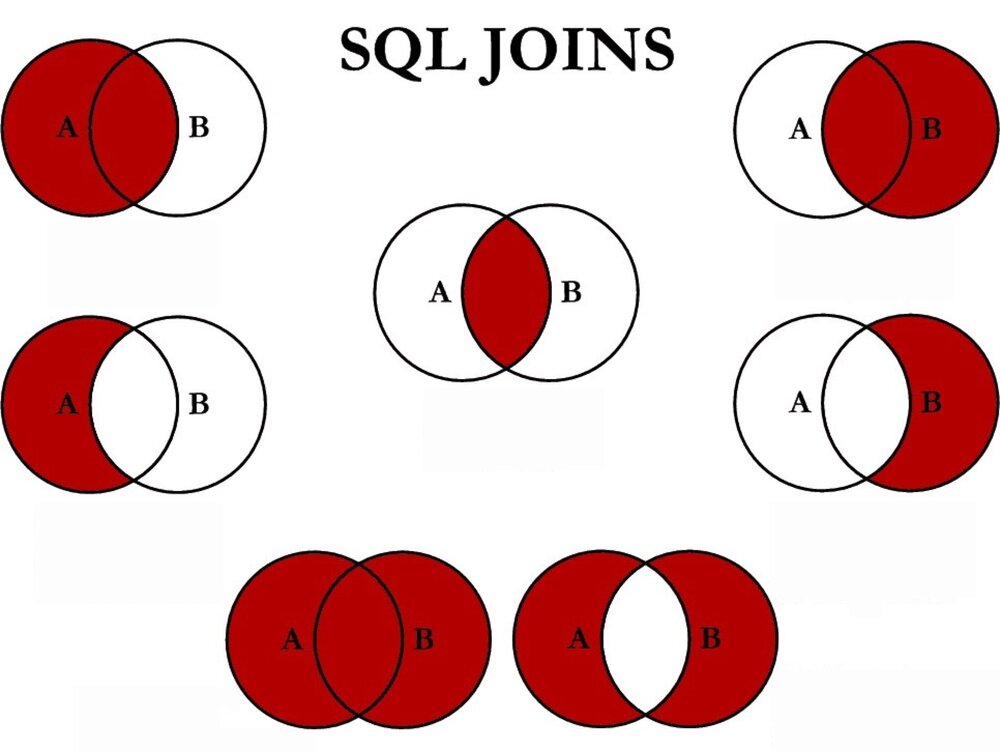

In [20]:
### Especificar la ruta de la imagen local
ruta_imagen = 'SQL_Joins.jpg'
### Mostrar la imagen en el Notebook
Image(filename = ruta_imagen)

In [21]:
q = """
SELECT clubes_ValorMercado_top10.name_club
, clubes_ValorMercado_top10.AvgMarketValue_club
, clubes.average_age
, clubes.stadium_name
, clubes.net_transfer_record
FROM clubes_ValorMercado_top10
LEFT JOIN clubes ON clubes_ValorMercado_top10.name_club = clubes.name
"""
Ex_LeftJoin = pysqldf(q)

In [22]:
Ex_LeftJoin

,name_club,AvgMarketValue_club,average_age,stadium_name,net_transfer_record
0,Manchester City Football Club,26497549.020,26.800,Etihad Stadium,€-133.80m
1,Real Madrid Club de Fútbol,23960555.556,27.300,Santiago Bernabéu,€-122.50m
2,Paris Saint-Germain Football Club,18676612.903,25.500,Parc des Princes,€-182.00m
3,Arsenal Football Club,16241319.444,25.600,Emirates Stadium,€-167.04m
4,FC Bayern München,15530970.149,26.700,Allianz Arena,€-14.25m
5,Liverpool Football Club,15454166.667,25.600,Anfield,€-111.30m
6,Futbol Club Barcelona,15182377.049,24.900,Olímpic Lluís Companys,+€64.04m
7,Chelsea Football Club,14347500.000,23.600,Stamford Bridge,€-198.40m
8,Tottenham Hotspur Football Club,13784166.667,25.400,Tottenham Hotspur Stadium,€-151.40m
9,Manchester United Football Club,12209230.769,26.400,Old Trafford,€-146.96m


In [23]:
### De esta manera se pueden hacer varias transformaciones y generar Data Frames de la nada a partir de SQL, lo cual vuelve el 
### trabajo de Python mucho mas facil si estamos acostumbrados a utilizar SQL. 

In [24]:
### Si se quiere hacer lo mismo en Pandas usando Python, seria de la siguiente manera.

In [25]:
### Generando un Data Frame, elegimos un nombre, en este caso la nombre jugadores
### Paso 1: Agrupar por 'current_club_name' y calcular el promedio

promedio_por_club = jugadores.groupby('current_club_name')['market_value_in_eur'].mean()

In [26]:
### Paso 2: Ordenar por el promedio descendente

orden_descendente = promedio_por_club.sort_values(ascending = False)

In [27]:
### Paso 2: Seleccionar las primeras 10 filas (top 10)
Top_10clubes = orden_descendente.head(11)

In [28]:
Top_10clubes

current_club_name
Manchester City Football Club       26497549.020
Real Madrid Club de Fútbol          23960555.556
Paris Saint-Germain Football Club   18676612.903
Arsenal Football Club               16241319.444
FC Bayern München                   15530970.149
Liverpool Football Club             15454166.667
Futbol Club Barcelona               15182377.049
Chelsea Football Club               14347500.000
Tottenham Hotspur Football Club     13784166.667
Manchester United Football Club     12209230.769
Newcastle United Football Club      10248161.765
Name: market_value_in_eur, dtype: float64

In [29]:
### Usange Merge en Pandas para unir las tabla que acabo de crear con la tabla de clubes

### Paso 1: Realizar el join utilizando merge

tablas_con_merge = Top_10clubes.reset_index().merge(clubes, left_on = 'current_club_name', right_on = 'name', how = 'left')

### Paso 2: Eliminar columnas innecesarias

tablas_con_merge = tablas_con_merge[['current_club_name', 'market_value_in_eur', 'average_age', 'stadium_name', 'net_transfer_record']]


In [30]:
tablas_con_merge

,current_club_name,market_value_in_eur,average_age,stadium_name,net_transfer_record
0,Manchester City Football Club,26497549.020,26.800,Etihad Stadium,€-133.80m
1,Real Madrid Club de Fútbol,23960555.556,27.300,Santiago Bernabéu,€-122.50m
2,Paris Saint-Germain Football Club,18676612.903,25.500,Parc des Princes,€-182.00m
3,Arsenal Football Club,16241319.444,25.600,Emirates Stadium,€-167.04m
4,FC Bayern München,15530970.149,26.700,Allianz Arena,€-14.25m
5,Liverpool Football Club,15454166.667,25.600,Anfield,€-111.30m
6,Futbol Club Barcelona,15182377.049,24.900,Olímpic Lluís Companys,+€64.04m
7,Chelsea Football Club,14347500.000,23.600,Stamford Bridge,€-198.40m
8,Tottenham Hotspur Football Club,13784166.667,25.400,Tottenham Hotspur Stadium,€-151.40m
9,Manchester United Football Club,12209230.769,26.400,Old Trafford,€-146.96m
